In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, LSTM, Reshape, Dropout, LayerNormalization
from tensorflow.keras.models import Model, Sequential
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import math
from sklearn.metrics import mean_absolute_error as mae
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.layers import concatenate
sc = MinMaxScaler(feature_range = (0,1))

import pandas as pd

In [2]:
df1 = pd.read_csv('./SelfData/0523/0523_self8G_ONUAi_ONU17.csv', usecols=[0], engine='python')
df1.head()

,Ai
0,7916
1,14490
2,0
3,8047
4,10022


In [3]:
df2 = pd.read_csv('./SelfData/0523/0523_self8G_ONUAi_ONU16.csv', usecols=[0], engine='python')
df2.head()

,Ai
0,0
1,0
2,0
3,0
4,0


In [4]:
df1 = df1.values
df1 = df1.astype('float32')

df2 = df2.values
df2 = df2.astype('float32')

In [5]:
print(np.max(df1))
print(np.max(df2))
#df2 = []

#for i in range(len(df)):
#    if(df[i] > 195000.0):
#        df[i] = 195000.0
#    df2.append(df[i])

623153.0
635745.0


In [6]:
#df = df2
#df1 = df1[:2000]
#df2 = df2[:2000]
print(len(df1))
print(len(df2))

46122
46122


In [7]:
# normalize the dataset
#scaler = MinMaxScaler(feature_range=(0, 1))
#datasetG = scaler.fit_transform(df1)
#datasetA = scaler.fit_transform(df2)
datasetG = df1
datasetA = df2

In [8]:
scaler = MinMaxScaler(feature_range=(0, 1))

In [9]:
# split into train and test sets
train_sizeG = int(len(datasetG) * 0.7) 
test_sizeG = len(datasetG) - train_sizeG
trainG, testG = datasetG[0:train_sizeG], datasetG[train_sizeG:len(datasetG)]

trainG = scaler.fit_transform(trainG)
testG = scaler.fit_transform(testG)
print(len(trainG), len(testG))

32285 13837


In [10]:
# split into train and test sets
train_sizeA = int(len(datasetA) * 0.7) 
test_sizeA = len(datasetA) - train_sizeA
trainA, testA = datasetA[0:train_sizeA], datasetA[train_sizeA:len(datasetA)]

#scaler = MinMaxScaler(feature_range=(0, 1))
trainA = scaler.fit_transform(trainA)
testA = scaler.fit_transform(testA)
print(len(trainA), len(testA))

32285 13837


In [11]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset) - look_back - 1):
        a = dataset[i:(i + look_back)]
        dataX.append(a)
        dataY.append(dataset[i + look_back])
    return np.array(dataX), np.array(dataY)

In [12]:
# reshape into X=t and Y=t+1
look_back = 128 #16
trainX_G, trainY_G = create_dataset(trainG, look_back)
testX_G, testY_G = create_dataset(testG, look_back)

trainX_A, trainY_A = create_dataset(trainA, look_back)
testX_A, testY_A = create_dataset(testA, look_back)

In [13]:
# reshape input to be [samples, time steps, features]
trainX_G = np.reshape(trainX_G, (trainX_G.shape[0], look_back, 1))
testX_G = np.reshape(testX_G, (testX_G.shape[0], look_back, 1))

trainX_A = np.reshape(trainX_A, (trainX_A.shape[0], look_back, 1))
testX_A = np.reshape(testX_A, (testX_A.shape[0], look_back, 1))
#print(trainX.shape[1])
print(trainX_G.shape)
print(trainY_G.shape)
print(testX_G.shape)
print(testY_G.shape)

print(trainX_A.shape)
print(trainY_A.shape)
print(testX_A.shape)
print(testY_A.shape)

(32156, 128, 1)
(32156, 1)
(13708, 128, 1)
(13708, 1)
(32156, 128, 1)
(32156, 1)
(13708, 128, 1)
(13708, 1)


In [14]:
#inputsR = Input(shape=(timesteps,))
inputs_A = Input(shape=(look_back,))
inputs_G = Input(shape=(look_back,))
#inputs = LayerNormalization(axis=1)(inputs)
#inputs_R_test = Reshape((inputs_R.shape[1],1))(inputs_R)
inputs_A_test = Reshape((inputs_A.shape[1], 1))(inputs_A)
inputs_G_test = Reshape((inputs_G.shape[1], 1))(inputs_G)

input_merge = concatenate([inputs_A_test,inputs_G_test], axis = -1)

tgt1 = Reshape((look_back, 2))(input_merge)

#tf.print(tgt1, output_stream=sys.stderr)

In [15]:
#tgt1 = LSTM(units=40, input_shape=(look_back, 2))(tgt1)
#predictions = Dense(1, activation='relu')(tgt1)

tgt1 = LSTM(units=128, return_sequences = True, input_shape=(look_back, 2))(tgt1)
tgt1 = Dropout(0.2)(tgt1)

tgt2 = LSTM(units=80, return_sequences = True)(tgt1)
tgt2 = Dropout(0.2)(tgt2)

tgt3 = LSTM(units=60, return_sequences = True)(tgt2)
tgt3 = Dropout(0.2)(tgt3)

#tgt4 = LSTM(units=80, return_sequences = True)(tgt3)
#tgt4 = Dropout(0.2)(tgt4)

#tgt5 = LSTM(units=40, return_sequences = True)(tgt4)
#tgt5 = Dropout(0.2)(tgt5)

#tgt6 = LSTM(units=20)(tgt5)
#tgt6 = Dropout(0.2)(tgt6)

#tgt7 = LSTM(units=20, return_sequences = True)(tgt6)
#tgt7 = Dropout(0.2)(tgt7)

#tgt8 = LSTM(units=20, return_sequences = True)(tgt7)
#tgt8 = Dropout(0.2)(tgt8)

#tgt9 = LSTM(units=20, return_sequences = True)(tgt8)
#tgt9 = Dropout(0.2)(tgt9)

tgt4 = LSTM(units=40)(tgt3)
tgt4 = Dropout(0.2)(tgt4)

#tgt6 = LSTM(units=40, return_sequences = True)(tgt5)

#tgt7 = LSTM(units=40)(tgt6)


#tgt5 = Flatten()(tgt5)
predictions = Dense(1, activation='relu')(tgt4)
#predictions = Dense(1)(tgt4)


model = Model(inputs=[inputs_A, inputs_G], outputs=predictions)
model.compile(loss='mean_squared_error', optimizer='adam',metrics=['mse','mae'])

history = model.fit([trainX_A, trainX_G], trainY_A, epochs=100, batch_size=128) #[1,0,0], [0,0,1]

Epoch 1/100
252/252 [==============================] - 6s 23ms/step - loss: 0.0017 - mse: 0.0017 - mae: 0.0196
Epoch 2/100
252/252 [==============================] - 6s 23ms/step - loss: 0.0016 - mse: 0.0016 - mae: 0.0191
Epoch 3/100
252/252 [==============================] - 6s 23ms/step - loss: 0.0015 - mse: 0.0015 - mae: 0.0187
Epoch 4/100
252/252 [==============================] - 6s 23ms/step - loss: 0.0014 - mse: 0.0014 - mae: 0.0184
Epoch 5/100
252/252 [==============================] - 6s 23ms/step - loss: 0.0013 - mse: 0.0013 - mae: 0.0182
Epoch 6/100
252/252 [==============================] - 6s 23ms/step - loss: 0.0013 - mse: 0.0013 - mae: 0.0179
Epoch 7/100
252/252 [==============================] - 6s 23ms/step - loss: 0.0013 - mse: 0.0013 - mae: 0.0180
Epoch 8/100
252/252 [==============================] - 6s 23ms/step - loss: 0.0013 - mse: 0.0013 - mae: 0.0178
Epoch 9/100
252/252 [==============================] - 6s 23ms/step - loss: 0.0014 - mse: 0.0014 - mae: 0.0180
E

look back = timesteps = 10, 4 LSTM layers

timesteps :  128


Text(0.5, 1.0, 'mae')

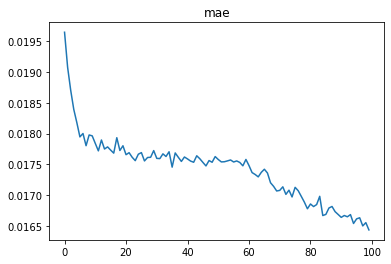

In [16]:
print('timesteps : ', look_back)
plt.plot(history.history['mae'])
plt.title('mae')

timesteps :  128


Text(0.5, 1.0, 'mse')

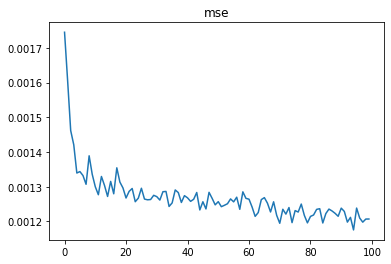

In [17]:
print('timesteps : ', look_back)
plt.plot(history.history['mse'])
plt.title('mse')

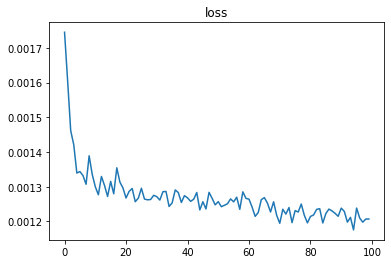

In [18]:
plt.title('loss')
plt.plot(history.history['loss'])

In [19]:
model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 128)]        0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, 128)]        0                                            
__________________________________________________________________________________________________
reshape (Reshape)               (None, 128, 1)       0           input_1[0][0]                    
__________________________________________________________________________________________________
reshape_1 (Reshape)             (None, 128, 1)       0           input_2[0][0]                    
_______________________________________________________________________________________

In [20]:
from sklearn.metrics import mean_squared_error as mse

trainPredict = model.predict([trainX_A, trainX_G])
testPredict = model.predict([testX_A, testX_G])

In [21]:
# invert predictions
#scaler = MinMaxScaler(feature_range=(0, 1))
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform(trainY_G)
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform(testY_A)
# calculate root mean squared error
trainScore = math.sqrt(mse(trainY, trainPredict))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mse(testY, testPredict))
print('Test Score: %.2f RMSE' % (testScore))
# calculate root mean absolute error
trainScore2 = math.sqrt(mae(trainY, trainPredict))
print('Train Score: %.2f RMAE' % (trainScore2))
testScore2 = math.sqrt(mae(testY, testPredict))
print('Test Score: %.2f RMAE' % (testScore2))

Train Score: 27867.88 RMSE
Test Score: 19225.18 RMSE
Train Score: 113.47 RMAE
Test Score: 100.74 RMAE


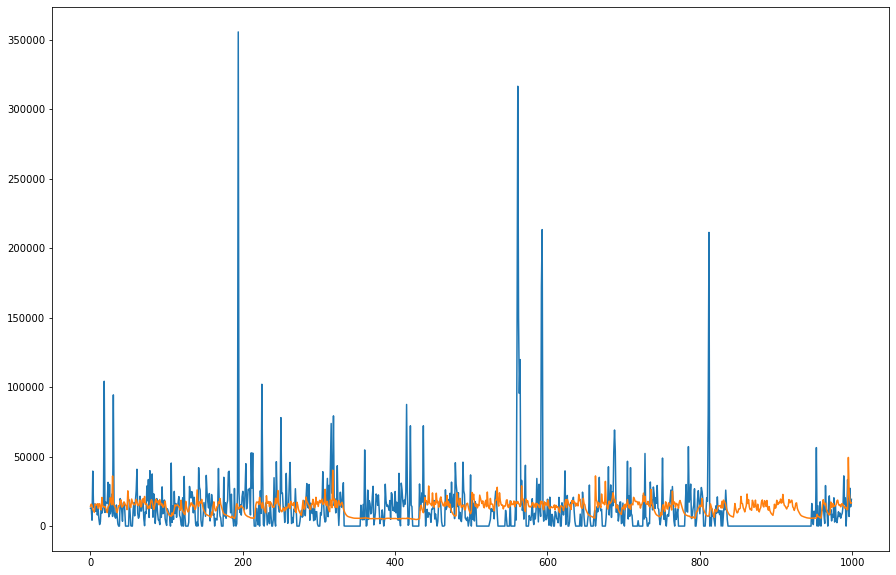

In [30]:
testPredictPlot = np.empty_like(datasetG)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(datasetG)-1] = testPredict
# plot baseline and predictions
plt.figure(figsize=(15, 10))
#plt.plot(datasetA[1500:])
plt.plot(datasetG[32414:33414])
#plt.plot(trainPredictPlot)
plt.plot(testPredictPlot[32414:33414])
plt.show()

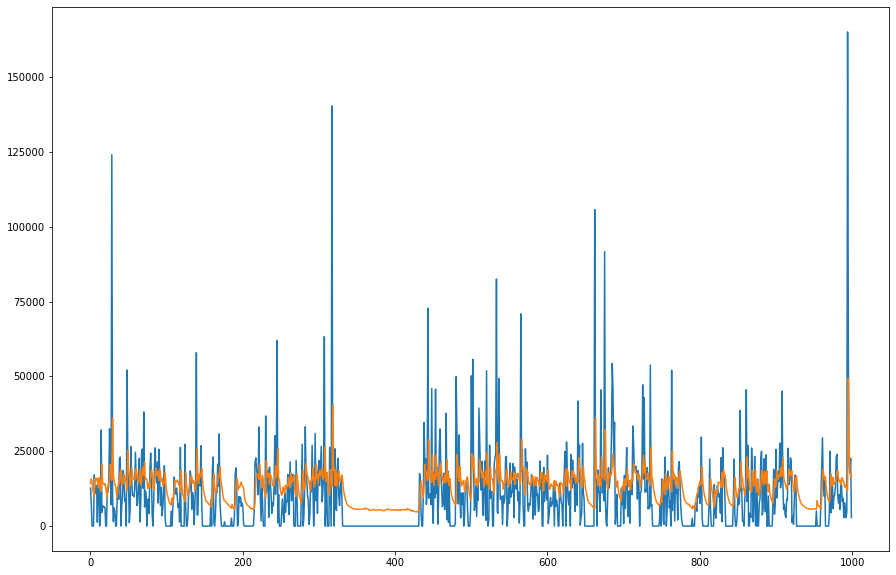

In [31]:
testPredictPlot = np.empty_like(datasetA)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(datasetA)-1] = testPredict
# plot baseline and predictions
plt.figure(figsize=(15, 10))
#plt.plot(datasetA[1500:])
plt.plot(datasetA[32414:33414])
#plt.plot(trainPredictPlot)
plt.plot(testPredictPlot[32414:33414])
plt.show()

In [32]:
'''
testPredictPlot = np.empty_like(datasetA)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(datasetA)-1] = testPredict
# plot baseline and predictions
plt.figure(figsize=(15, 10))
#plt.plot(datasetA[1500:])
plt.plot(datasetA[14000:15000])
#plt.plot(trainPredictPlot)
plt.plot(testPredictPlot[14000:15000])
plt.show()
'''

'\ntestPredictPlot = np.empty_like(datasetA)\ntestPredictPlot[:, :] = np.nan\ntestPredictPlot[len(trainPredict)+(look_back*2)+1:len(datasetA)-1] = testPredict\n# plot baseline and predictions\nplt.figure(figsize=(15, 10))\n#plt.plot(datasetA[1500:])\nplt.plot(datasetA[14000:15000])\n#plt.plot(trainPredictPlot)\nplt.plot(testPredictPlot[14000:15000])\nplt.show()\n'

In [33]:
max(testPredict)

array([573763.], dtype=float32)

In [26]:
#testPredict

In [27]:
#testY_A

In [28]:
#datasetA[:100]

In [34]:
model.save('0523_U08D00_ONU16Ai_635745_ONU17Ai_623153_4layer[128,80,60,40]_lookback128.h5', include_optimizer=False)